Import the neccesary libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Data Loading

In [24]:
print("Loading Tesla Stock data")
try:
    # We use index_col=0 to handle the leading comma in the first column of the CSV.
    df = pd.read_csv('tesla.csv', index_col=0)
    print("Data loaded successfully!")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: The file 'tesla.csv' was not found. Please ensure it is in the same directory as the script.")
    exit()


Loading Tesla Stock data
Data loaded successfully!

First 5 rows of the dataset:
         Date      Open      High       Low     Close  Adj Close     Volume
0     6/29/10  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1     6/30/10  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  07-01-2010  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  07-02-2010  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  07-06-2010  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


Data Preprocessing and Feature Engineerng

In [25]:
# Data Preprocessing is the process of preparing your data for the model
# We need to select our features (the column we'll use to predict) and our target column we want to predict
# We'll drop the "Date" and "Adj Close" columns as "Adj Close" is often the same as "Close"
# and the date requires more advanced feature engineering for a simple linear model

# Drop the unneccessary columns
df = df.drop(columns=["Date","Adj Close"],errors="ignore")

# Rename the columns for clarity and consistency
df.rename(columns={
    "Open":"open",
    "High":"high",
    "Low":"low",
    "Close":"close",
    "Volume":"volume"
},inplace=True)

# Check for missing values
df_missing = df.isnull().sum()
print("Missing values")
print(df_missing)

# Check for duplicates
df_duplicates = df.drop_duplicates()

# Define our featutes (X) and target (y)
features = ["open","high","low","volume"]
target = "close"

X = df[features]
y = df[target]

print("Shape of features (X):",X.shape)
print("Shape of target (y):",y.shape)

Missing values
open      0
high      0
low       0
close     0
volume    0
dtype: int64
Shape of features (X): (3637, 4)
Shape of target (y): (3637,)


Data Splitting

In [26]:
# It's a best practice to split the data into training and testing sets
# The model will learn from the training data, and we will evaluate its performance on the testing data
# to ensure it can can generalize to a new, unseen data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 2909 samples
Testing set size: 728 samples


Model Training

In [27]:
# We create an instance of the Linear Regression model and train it using the "fit" method
print("Training the Linear Regression model")
model = LinearRegression()
model.fit(X_train,y_train)
print("Model training complete")

Training the Linear Regression model
Model training complete


Model Evaluation

In [28]:
# We make predictions on the test set and calculate evaluation metrics to access the model's performance
print("Evaluating model")
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Evaluating model
Mean Squared Error (MSE): 2.35
R-squared: 1.00


Visualization

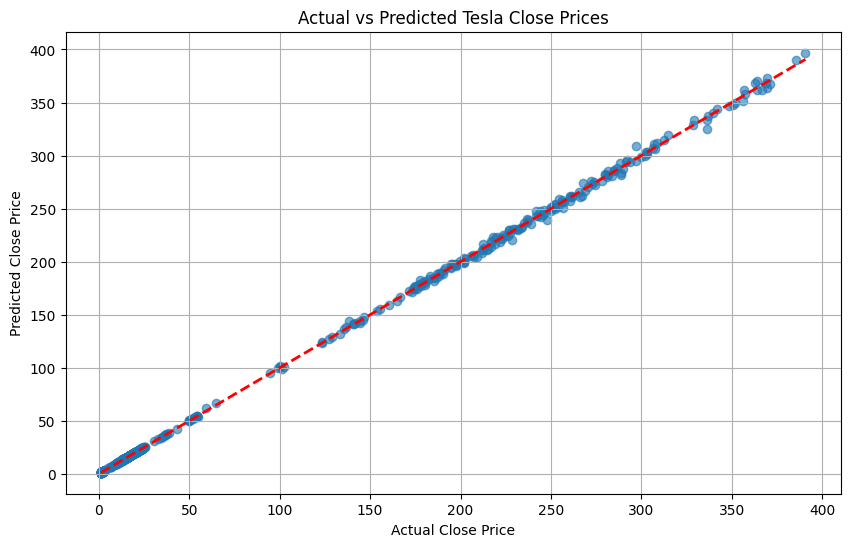

In [29]:
# A scatter plot of actual vs predicted values is a great way to visualize the model's performance
# A perfect model would have all points lying on the dashed red line

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",lw=2)
plt.title("Actual vs Predicted Tesla Close Prices")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.grid(True)
plt.show()

Making a new prediction

In [30]:
# You can use the trained model to predict the price for a new data
# Let's create a hypothetical data point
# Note: The values here are hypothetical for demonstration
new_data = pd.DataFrame({
    "open":[250.0],
    "high":[255.0],
    "low":[248.0],
    "volume":[15000000]
})

predicted_price = model.predict(new_data)
print(f"Example prediction for a new data point")
print(f"Features: open=250,high=255,low=248,volume=15M")
print(f"Predicted Close Price: ${predicted_price[0]:.2f}")

Example prediction for a new data point
Features: open=250,high=255,low=248,volume=15M
Predicted Close Price: $252.69
